In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import seaborn as sns

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
category = [ col for col in df.columns if df[col].dtypes == "object"]

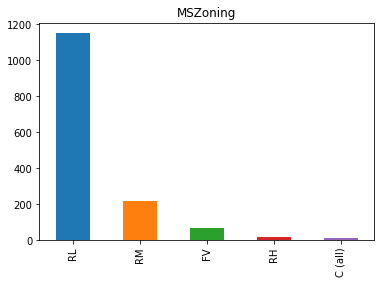

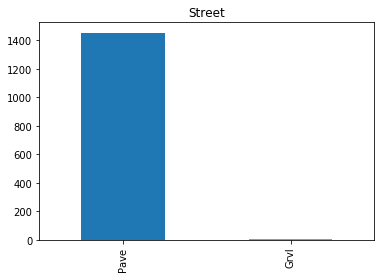

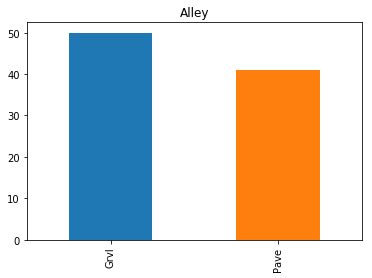

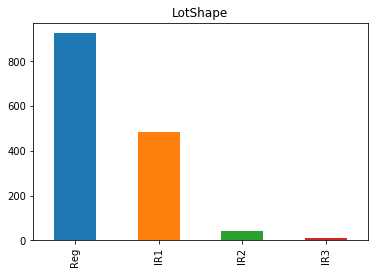

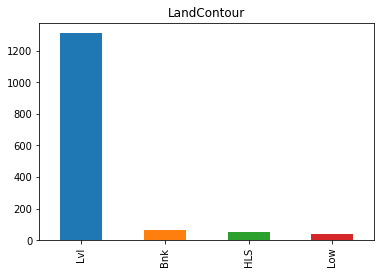

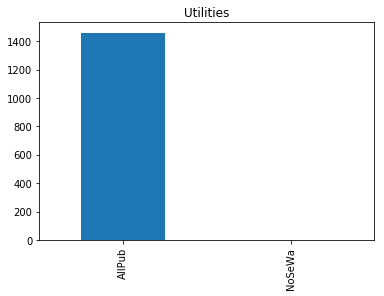

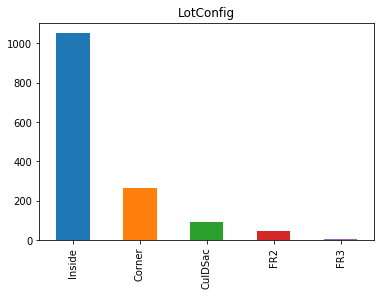

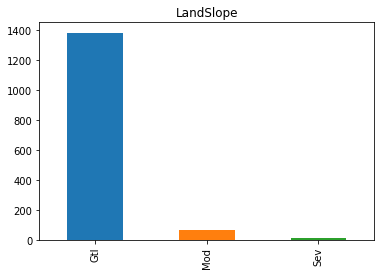

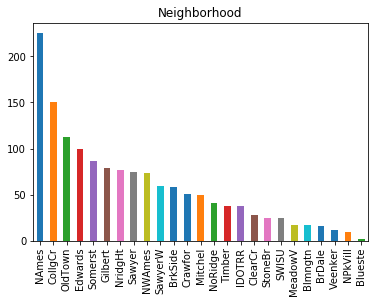

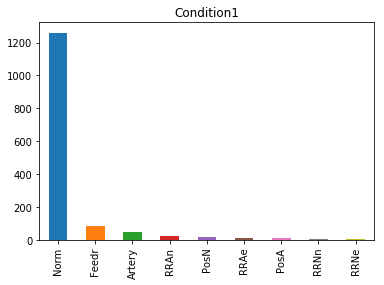

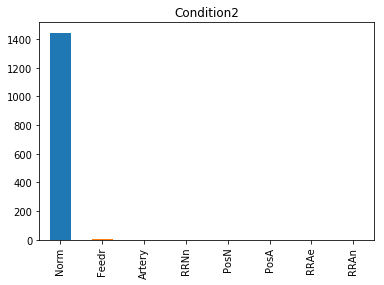

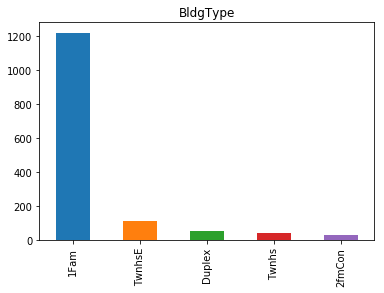

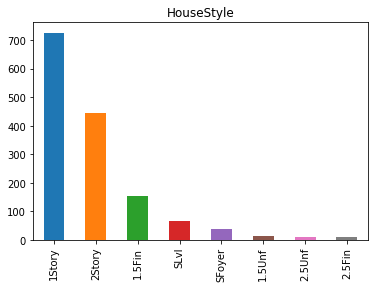

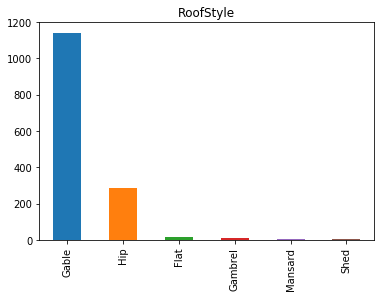

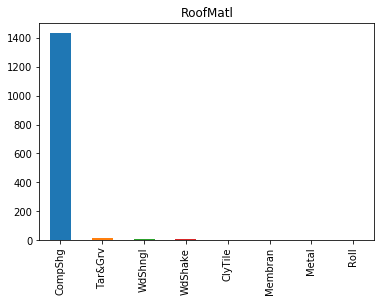

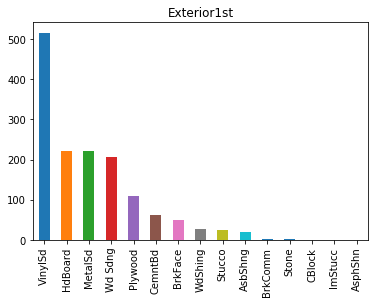

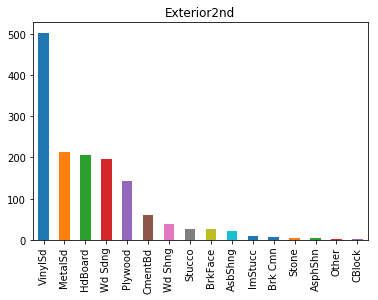

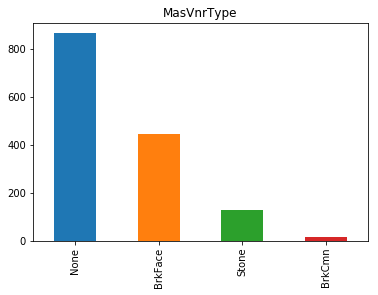

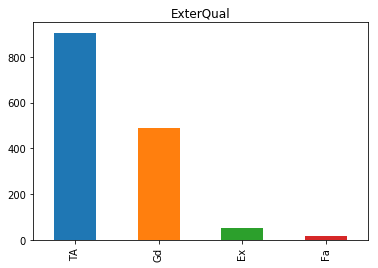

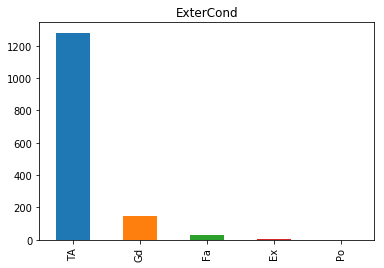

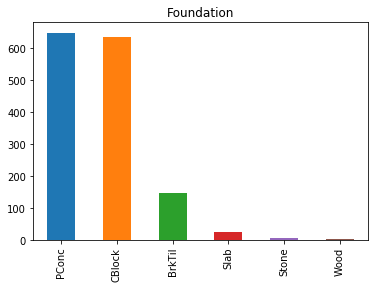

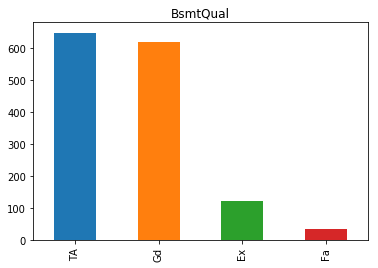

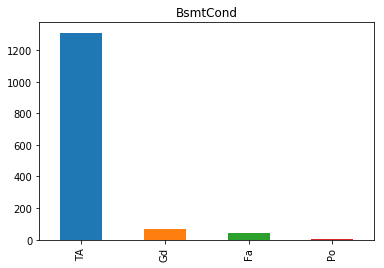

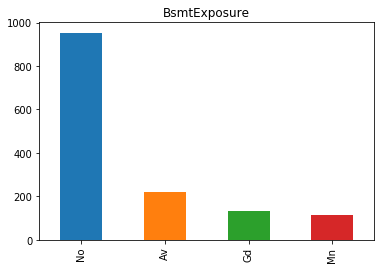

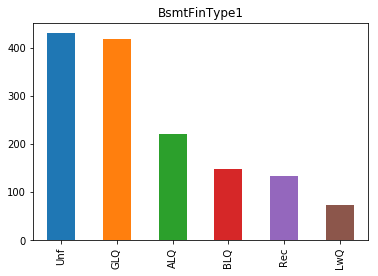

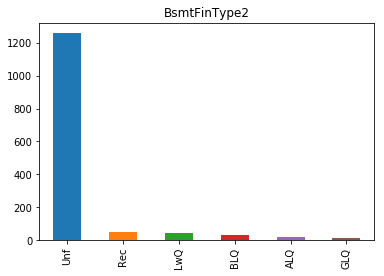

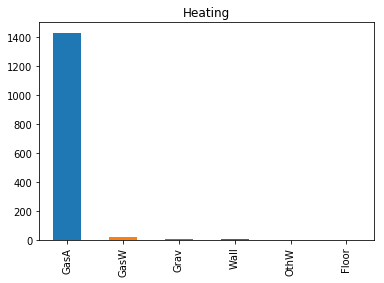

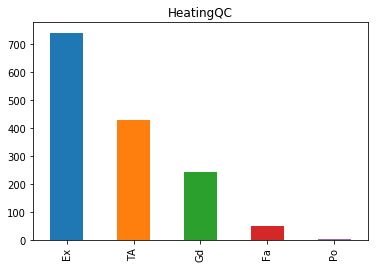

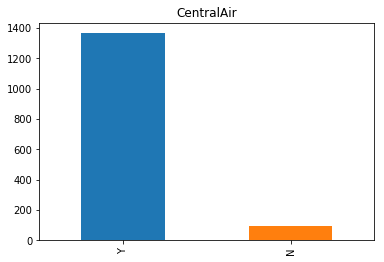

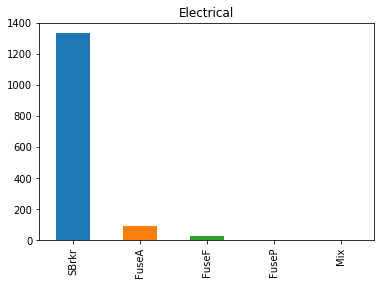

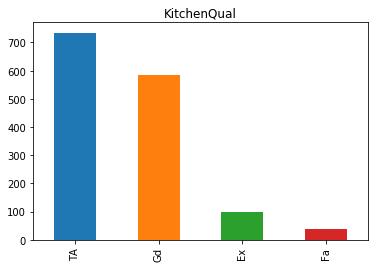

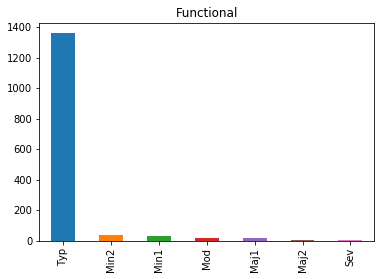

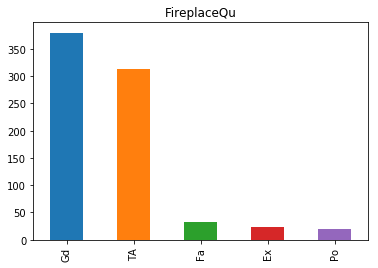

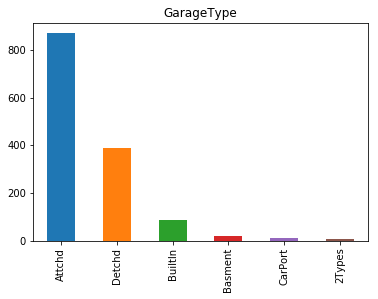

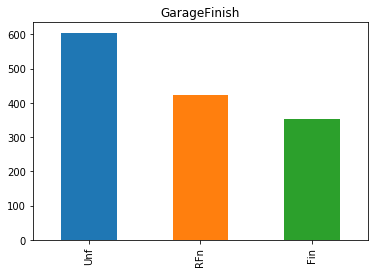

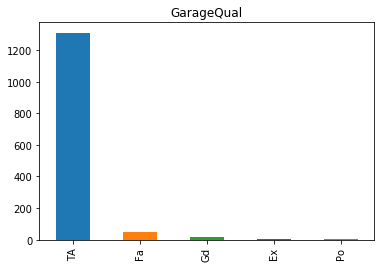

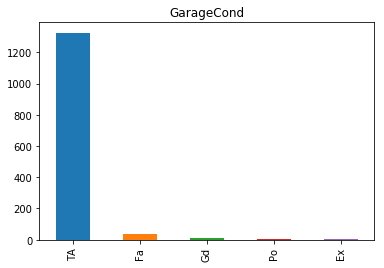

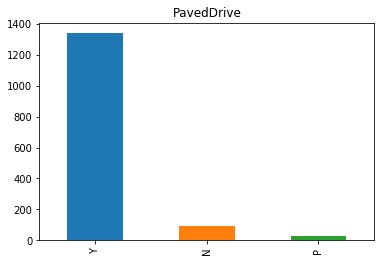

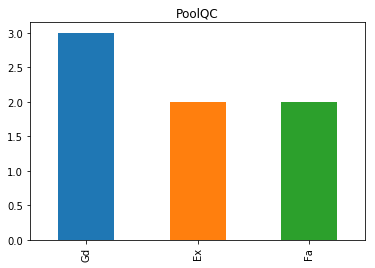

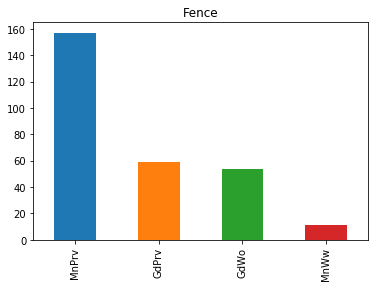

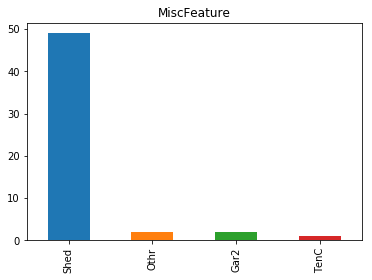

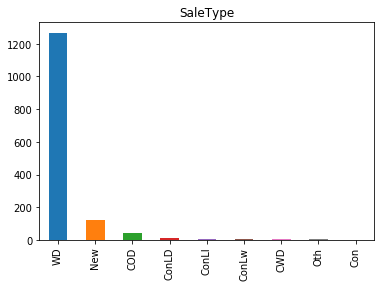

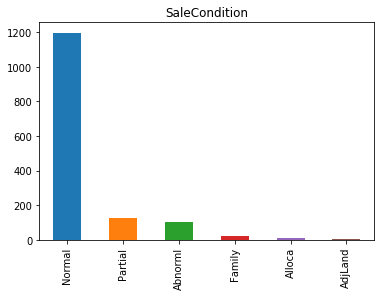

In [11]:
for col in category:
    df[col].value_counts().plot(kind='bar') 
    plt.title(col) 
    plt.show()


In [6]:
col_one= ['MSZoning'
,'Alley'
,'LotShape'
,'LotConfig'
,'BldgType'
,'HouseStyle'
,'RoofStyle'
,'MasVnrType'
,'ExterQual'
,'Foundation'
,'BsmtQual'
,'BsmtCond'
,'BsmtExposure'
,'BsmtFinType1'
,'HeatingQC'
,'KitchenQual'
,'FireplaceQu'
,'GarageType'
,'GarageFinish'
,'GarageQual'
,'PoolQC'
,'Fence'
]

D:\anaconda\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


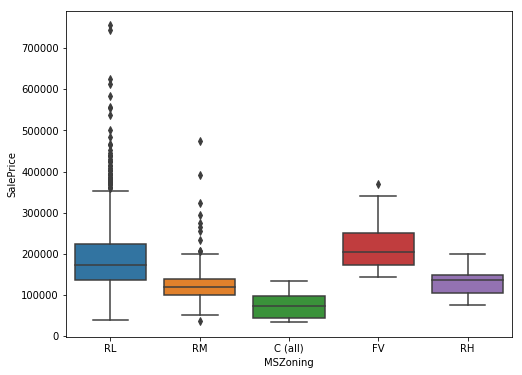

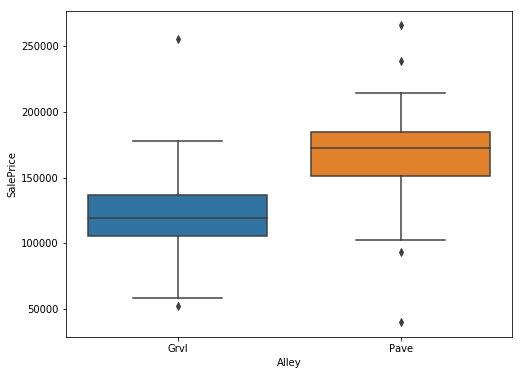

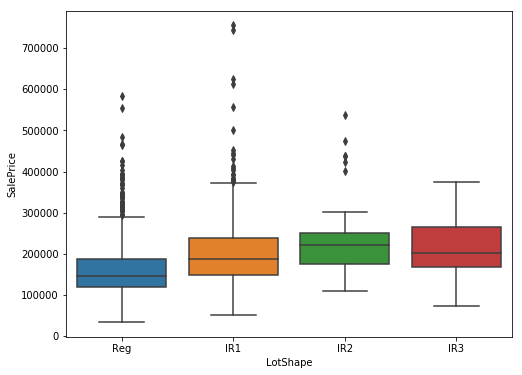

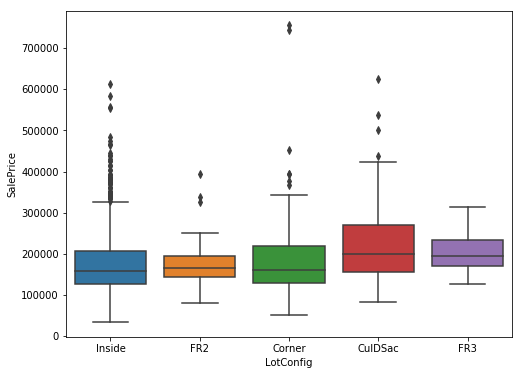

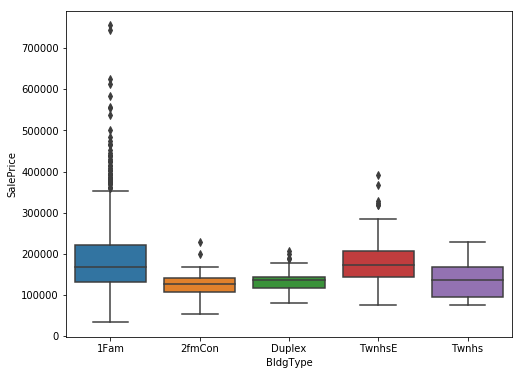

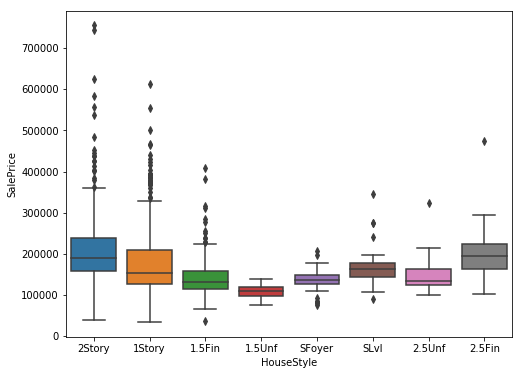

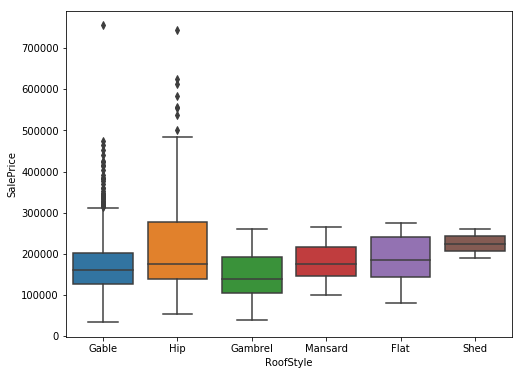

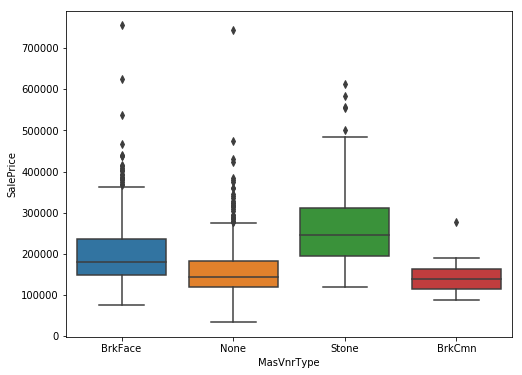

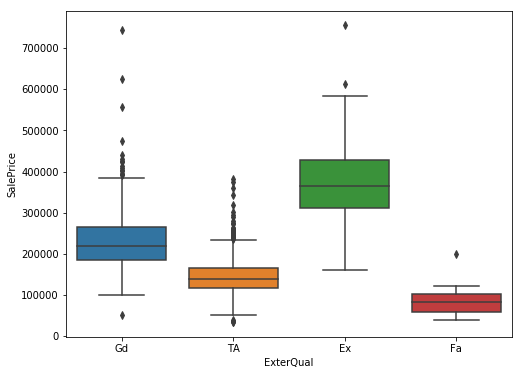

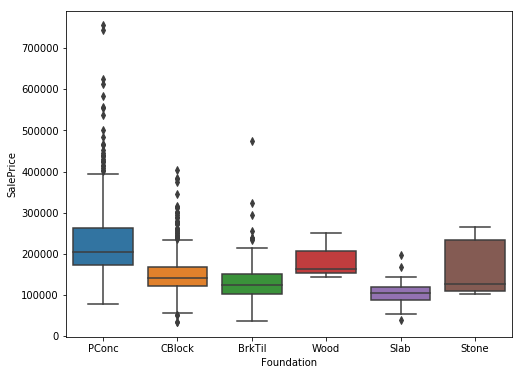

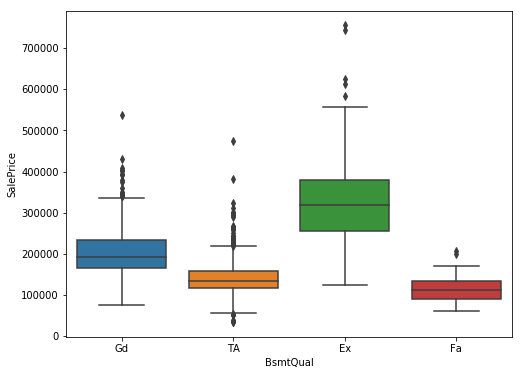

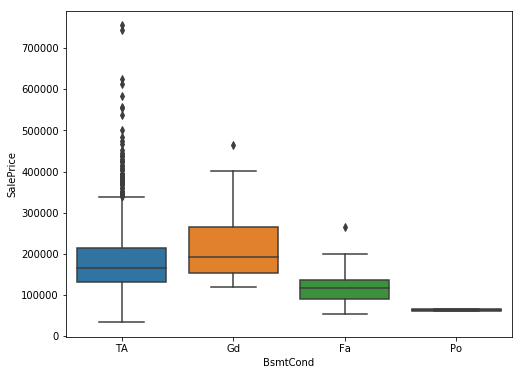

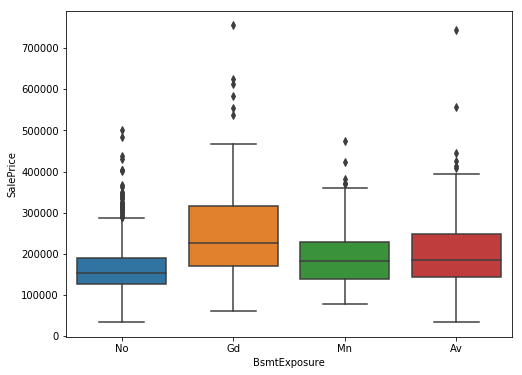

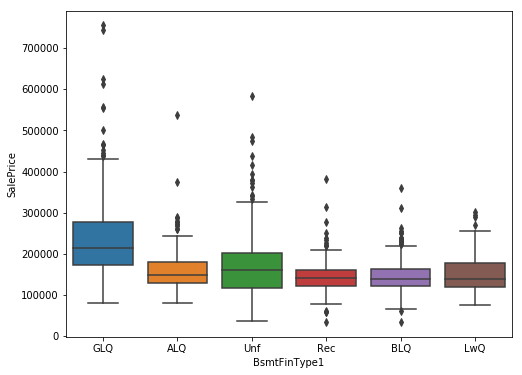

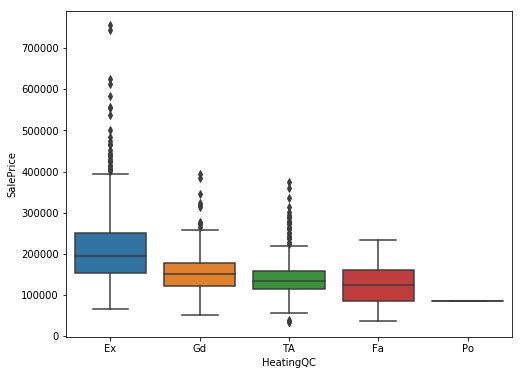

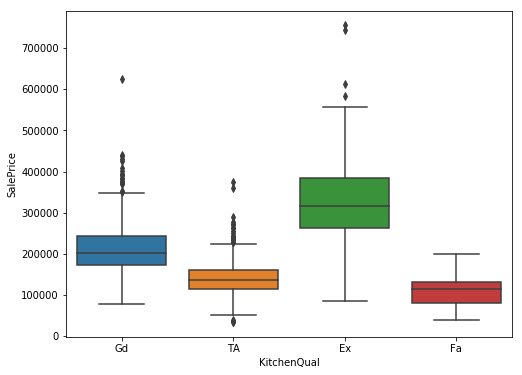

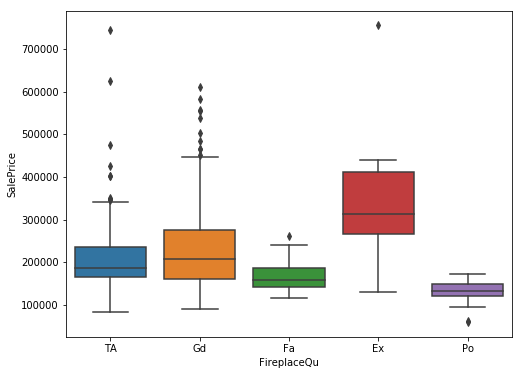

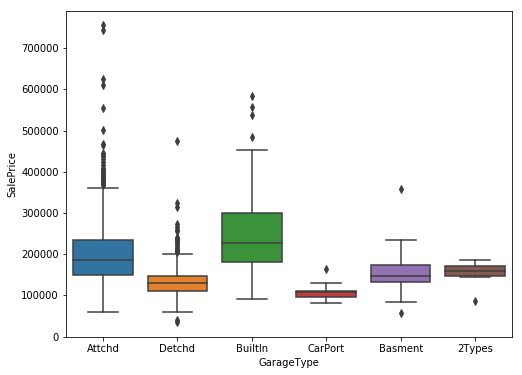

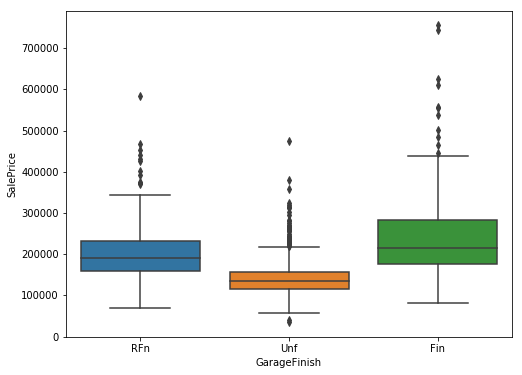

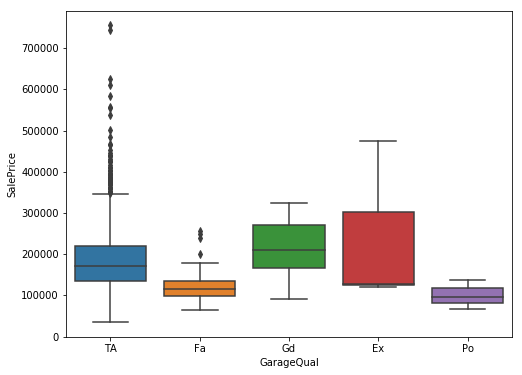

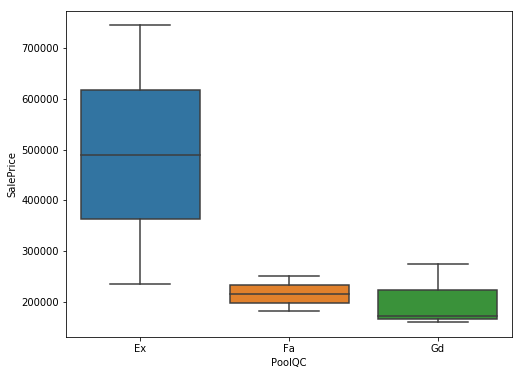

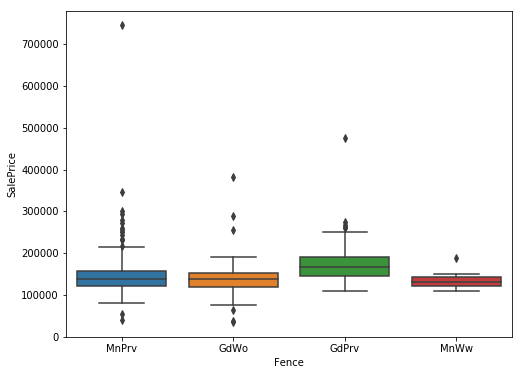

In [31]:
for col in col_one:
    data = pd.concat([df[col],df['SalePrice']],axis=1)
    f, ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x=col, y='SalePrice',data=data)


In [35]:
aa = pd.get_dummies(df.MSZoning) 
aa.head()

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [7]:
x=df.loc[:,col_one]

In [8]:
x_one_hot=pd.get_dummies(x, prefix=['MSZoning'
,'Alley'
,'LotShape'
,'LotConfig'
,'BldgType'
,'HouseStyle'
,'RoofStyle'
,'MasVnrType'
,'ExterQual'
,'Foundation'
,'BsmtQual'
,'BsmtCond'
,'BsmtExposure'
,'BsmtFinType1'
,'HeatingQC'
,'KitchenQual'
,'FireplaceQu'
,'GarageType'
,'GarageFinish'
,'GarageQual'
,'PoolQC'
,'Fence'])

In [9]:
x.shape

(1460, 22)

In [10]:
x_one_hot.shape

(1460, 102)

In [11]:
x_one_hot["Id"]= df.loc[:,"Id"]

In [12]:
x_number = df.loc[:,["Id","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]]

In [13]:
x_data = pd.merge(x_one_hot,x_number,on="Id")

In [14]:
x_data.shape

(1460, 116)

In [15]:
x_data.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea
0,0,0,0,1,0,0,0,0,0,0,...,196.0,856,856,1710,2,8,0,2003.0,2,548
1,0,0,0,1,0,0,0,0,0,0,...,0.0,1262,1262,1262,2,6,1,1976.0,2,460
2,0,0,0,1,0,0,0,1,0,0,...,162.0,920,920,1786,2,6,1,2001.0,2,608
3,0,0,0,1,0,0,0,1,0,0,...,0.0,756,961,1717,1,7,1,1998.0,3,642
4,0,0,0,1,0,0,0,1,0,0,...,350.0,1145,1145,2198,2,9,1,2000.0,3,836


In [19]:
x_data=x_data.drop("GarageYrBlt",axis=1)

In [20]:
x_data.loc[x_data.isnull()["MasVnrArea"],:] = x_data.loc[x_data.isnull()["MasVnrArea"],:].fillna(value=x_data["MasVnrArea"].mean())

In [25]:
aa = pd.DataFrame(x_data.isnull().sum())
aa.loc[aa[0]>1]

,0


In [29]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 115 entries, MSZoning_C (all) to GarageArea
dtypes: float64(1), int64(12), uint8(102)
memory usage: 305.1 KB


In [30]:
x_data_one = x_data.values

In [33]:
x_data_one= x_data_one.astype(np.float32)
x_data_one

array([[  0.,   0.,   0., ...,   0.,   2., 548.],
       [  0.,   0.,   0., ...,   1.,   2., 460.],
       [  0.,   0.,   0., ...,   1.,   2., 608.],
       ...,
       [  0.,   0.,   0., ...,   2.,   1., 252.],
       [  0.,   0.,   0., ...,   0.,   1., 240.],
       [  0.,   0.,   0., ...,   0.,   1., 276.]], dtype=float32)

In [36]:
len(x_data_one)

1460

In [37]:
y_data = df.iloc[:,-1]
y_data.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [38]:
y_data = y_data.values
y_data = y_data.astype(np.float32)
y_data=y_data.reshape(-1,1)

In [39]:
print(x_data.shape)
print(y_data.shape)

(1460, 115)
(1460, 1)


In [54]:
X = tf.placeholder(tf.float32, shape=[None,115])
Y = tf.placeholder(tf.float32, shape=[None,1])


W = tf.Variable(tf.random_normal([115,1],name='weight'))
b = tf.Variable(tf.random_normal([1],name='bias'))

hypothesis = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hypothesis-Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-9)
train = optimizer.minimize(cost)

In [55]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [56]:
for step in range(200001):
    cost_val, hy_val, _ = sess.run(
        [cost,hypothesis,train],
        feed_dict={X:x_data, Y:y_data})
    if step % 1000 == 0:
        print(step,"Cost : ",cost_val,
             "\nPreadiction\n",hy_val)

0 Cost :  39739175000.0 
Preadiction
 [[-1334.7402]
 [-1105.3462]
 [-1341.9032]
 ...
 [-3428.135 ]
 [-2837.293 ]
 [-2806.9324]]
1000 Cost :  2868855800.0 
Preadiction
 [[180817.2 ]
 [179708.88]
 [187806.84]
 ...
 [215842.5 ]
 [160108.55]
 [176897.16]]
2000 Cost :  2486002700.0 
Preadiction
 [[183437.17]
 [179737.31]
 [192117.22]
 ...
 [219675.88]
 [148910.44]
 [169694.28]]
3000 Cost :  2341552000.0 
Preadiction
 [[185322.88]
 [179036.67]
 [194958.1 ]
 ...
 [221924.94]
 [142353.38]
 [165253.88]]
4000 Cost :  2275420000.0 
Preadiction
 [[186778.66]
 [178092.72]
 [196960.  ]
 ...
 [223140.6 ]
 [138385.5 ]
 [162369.92]]
5000 Cost :  2237107000.0 
Preadiction
 [[187971.31]
 [177134.17]
 [198470.56]
 ...
 [223676.16]
 [135872.5 ]
 [160375.61]]
6000 Cost :  2210199600.0 
Preadiction
 [[188992.97]
 [176258.  ]
 [199682.31]
 ...
 [223762.58]
 [134186.56]
 [158901.38]]
7000 Cost :  2189041700.0 
Preadiction
 [[189895.19]
 [175495.84]
 [200702.78]
 ...
 [223553.44]
 [132979.45]
 [157741.5 ]]
8000

----

In [57]:
test = pd.read_csv("test.csv")

In [58]:
x_test=test.loc[:,col_one]

In [59]:
x_test.shape

(1459, 22)

In [60]:
x_one_hot_test=pd.get_dummies(x_test, prefix=['MSZoning'
,'Alley'
,'LotShape'
,'LotConfig'
,'BldgType'
,'HouseStyle'
,'RoofStyle'
,'MasVnrType'
,'ExterQual'
,'Foundation'
,'BsmtQual'
,'BsmtCond'
,'BsmtExposure'
,'BsmtFinType1'
,'HeatingQC'
,'KitchenQual'
,'FireplaceQu'
,'GarageType'
,'GarageFinish'
,'GarageQual'
,'PoolQC'
,'Fence'])

In [61]:
x_one_hot_test.shape

(1459, 99)

In [67]:
x_one_hot_test["Id"]= test.loc[:,"Id"]

In [68]:
x_tnumber = test.loc[:,["Id","OverallQual","YearBuilt","YearRemodAdd","MasVnrArea","TotalBsmtSF","1stFlrSF","GrLivArea","FullBath","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]]

In [69]:
x_data = pd.merge(x_one_hot_test,x_tnumber,on="Id")

In [70]:
x_data.shape

(1459, 113)

In [71]:
x_data=x_data.drop("GarageYrBlt",axis=1)

In [72]:
x_data.loc[x_data.isnull()["MasVnrArea"],:] = x_data.loc[x_data.isnull()["MasVnrArea"],:].fillna(value=x_data["MasVnrArea"].mean())

In [73]:
aa = pd.DataFrame(x_data.isnull().sum())
aa.loc[aa[0]>1]

,0


In [88]:
x_data.isnull().sum().sort_values()

MSZoning_C (all)      0
GarageType_Attchd     0
GarageType_2Types     0
FireplaceQu_TA        0
FireplaceQu_Po        0
FireplaceQu_Gd        0
FireplaceQu_Fa        0
FireplaceQu_Ex        0
KitchenQual_TA        0
KitchenQual_Gd        0
KitchenQual_Fa        0
KitchenQual_Ex        0
GarageType_Basment    0
HeatingQC_TA          0
HeatingQC_Gd          0
HeatingQC_Fa          0
HeatingQC_Ex          0
BsmtFinType1_Unf      0
BsmtFinType1_Rec      0
BsmtFinType1_LwQ      0
BsmtFinType1_GLQ      0
BsmtFinType1_BLQ      0
BsmtFinType1_ALQ      0
BsmtExposure_No       0
BsmtExposure_Mn       0
HeatingQC_Po          0
BsmtExposure_Gd       0
GarageType_BuiltIn    0
GarageType_Detchd     0
Fireplaces            0
                     ..
HouseStyle_SFoyer     0
HouseStyle_SLvl       0
RoofStyle_Flat        0
BsmtCond_Gd           0
BsmtCond_Fa           0
BsmtQual_TA           0
BsmtQual_Gd           0
BsmtQual_Fa           0
BsmtQual_Ex           0
Foundation_Wood       0
Foundation_Stone

In [83]:
x_data.loc[x_data.isnull()["GarageCars"],:] = x_data.loc[x_data.isnull()["GarageCars"],:].fillna(value=x_data["GarageCars"].mean())
x_data.loc[x_data.isnull()["GarageArea"],:] = x_data.loc[x_data.isnull()["GarageArea"],:].fillna(value=x_data["GarageArea"].mean())

In [85]:
x_data['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [87]:
x_data.loc[x_data.isnull()["TotalBsmtSF"],:] = x_data.loc[x_data.isnull()["TotalBsmtSF"],:].fillna(value=x_data["TotalBsmtSF"].mean())

In [89]:
x_data.shape

(1459, 112)

In [91]:
sess.run(hypothesis, feed_dict={X:x_data})

ValueError: Cannot feed value of shape (1459, 112) for Tensor 'Placeholder_8:0', which has shape '(?, 115)'